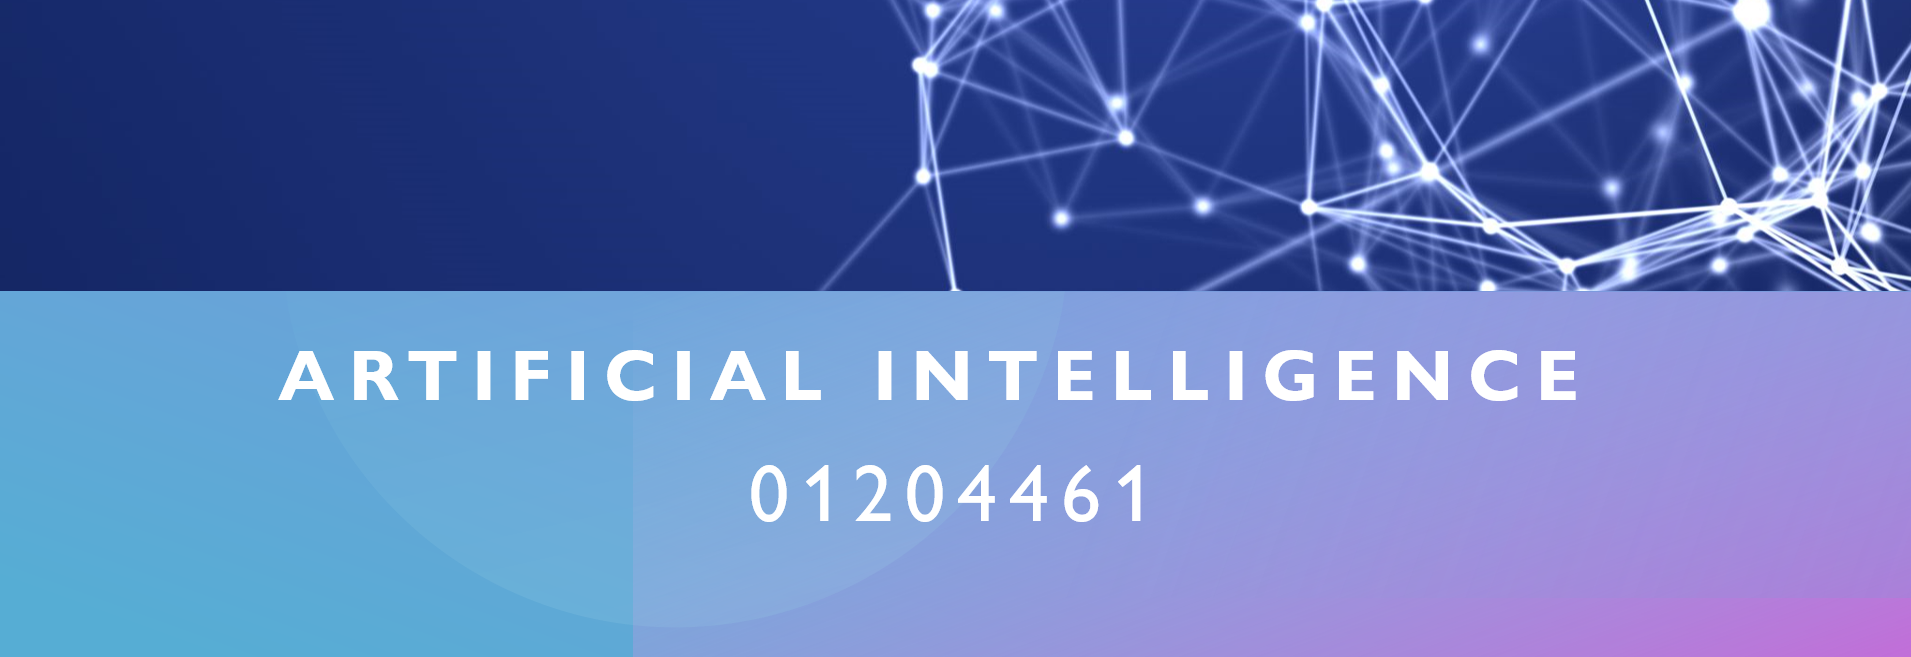

#  Computer Vision Example
To recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.



## import


In [9]:
#!pip install tensorflow==2.5.0

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


## Load data
โหลดข้อมูลดาต้าเซต  Fashion MNIST ใน tf.keras datasets API

In [10]:
                                                                  #load data
    f_mnist = tf.keras.datasets,fashion_mnist

IndentationError: unexpected indent (1244622153.py, line 2)

##Data Train/ Data Test 
แบ่งชุดข้อมูล ฝึกสอน และ ทดสอบ

In [11]:
                                                                                  #แบ่งชุดข้อมูล สำหรับฝึกสอน และทดสอบ
    (traing_images , train_labels) , (teat_images , teat_labels) = f_mnist.load_data()

IndentationError: unexpected indent (388293481.py, line 2)

##Exploration data ❤

###Ex_01 What does these values look like? **

In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)

print(taining_images(1))

                                                            # actual graphic training_images[0]


NameError: name 'taining_images' is not defined

Let's print a training image, and a training label 

###Answer_01 


In [13]:
                                                  # pixel values  training_images[0]
                                                  # label training_images[0]

###EX_02  Take a look at index 42
Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

In [14]:
                                                            # actual graphic training_images[42]       
plt.show()

###Answer_02

Let's print a training image, and a training label 

In [15]:
                                                  # pixel values  training_images[42]
                                                  # label training_images[42]
plt.imshow(training_images[42])
plt.show()
                                        

NameError: name 'training_images' is not defined

##Normalization ❤

การนอมัลไลเซชัน เนื่องจากค่าของข้อมูลมีค่าตั้งแต่ 0 - 255 ซึ่งเป็นตัวเลขที่มีค่ามากไป เราต้องการทำการนอมัลไลเซชัน ให้เหลือแค่เลขทศนิยมไม่เกิน 1 หรือมีค่าระหว่า 0 - 1 จึงใช้วิธีการหารข้อมูลด้วย 255.0 ซึ่งจะช่วยให้การประมวลผลเร็วขึ้น เทรนเร็วขึ้น โมเดลมีประสิทธิภาพมากขึ้น 

In [16]:
training_images                                           # / 255.0
test_images                                                # / 255.0

NameError: name 'training_images' is not defined

###Ex_03  Let's print a training image after normalized

###Answer_03

In [17]:
                                                  # pixel values  training_images[42]
                                                  # label training_images[42]
plt.imshow(training_images[42])
plt.show()                      

NameError: name 'training_images' is not defined

##Create Model ❤

เริ่มสร้างแบบจำลอง โดยการออกแบบสถาปัตยกรรมโครงข่ายของนิวรอลเน็ตเวิร์คดังนี้

In [18]:
model = tf.keras.models.Sequential( #CODE HERE)

SyntaxError: incomplete input (688706465.py, line 1)

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


###  Hint  ❤

คำสั่งในการสร้างเลเยอ์ของนิวรอลเน็ตเวิร์ค คือ Sequence()
ประกอบด้วย 
* **Input layer** ทำหน้าที่รับข้อมูลเข้ามาเป็นภาพ 28x28 พิกเซล จากนั้นใช้คำสั่ง Flatten เพื่อแปลงข้อมูลแบบตาราง 2 มิติ (2D array)ให้กลายเป็นแถวเรียงเดี่ยว (1D array)
* **hidden layer**หรือชั้นซ่อน เป็นชั้นที่อยู่ระหว่างอินพุต และเอาต์พุต เราจะใช้คำสั่ง  Dense เพื่อเชื่อมต่อกับอินพุต และเอาต์พุต  โดยระบุว่าชั้นนี้มี 128 นิวรอล ทำไมต้อง 128 นิวรอล ไม่มีกฎตายตัว แต่ถ้านิวรอลมาก หมายถึง มีพารามิเตอร์มาก ก็อาจจะจดจำการฝึกฝนได้ดี แต่ระบบก็จะการทำงานช้า เรียนรู้ช้า และอาจจะเกิดโอเวอร์ฟิต และถ้านิวรอลน้อยไป พารามิเตอร์ก็อาจจะน้อยไปไม่เพียงพอกับการเรียนรู้ ทำให้จับคู่คำตอบไม่ดี คำถาม แล้วค่าไหนถึงจะเป็นจำนวนนิวรอลที่เหมาะสม คำตอบ ต้องทดลองซ้ำหลายๆครั้ง เพื่อเลือกค่าที่ดีที่สุด กระบวนการนี้เรียกว่า Hyperparameter tuning เป็นการปรับค่าไฮเปอร์พารามิเตอร์ที่ใช้ในการควบคุมการเทรน
ฟังก์ชัน Relu มักใช้เป็นฟังก์ชันในชั้นซ่อน โดยจะเป็นฟังก์ชันทางคณิตศาตร์ที่ระบุวิธีคืนค่าว่านิวรอลตัวไหนควร Activate หรือเปิด  ตัวไหนควรปิด ที่ทำการเปลี่ยนผลลัพธ์สุดท้ายในนิวรอลให้เป็นแค่ค่า 0 หรือมากกว่า 0
* **Output layer** ซึ่งเป็น Dense เหมือนกัน แต่กำหนดให้มีค่า 10 เท่ากับจำนวนคลาสคำตอบที่เราจะจำแนก ( เสื้อผ้าและเครื่องแต่งกาย 10 แบบ)
ในชั้นเอาต์พุต Activation function นิยมใช้ Softmax เนื่องจากนิวรอลเอาต์พุตแต่ละเซลล์ จะแสดงค่าเป็นค่าความน่าจะเป็น Soft maxจะเป็นฟังก์ชันที่ช่วยเลือกค่าที่มีความน่าจะเป็นสูงสุดเป็นคำตอบเดียวสำหรับการทำนาย


##Compile model
การคอมไพล์โมเดลโดยระบุ optimizer และ loss function 
โดยเลือกลอสส์ฟังก์ชันชนิดเอนโทรปีข้ามหมวดหมู่ ( sparse_categorical_crossentropy ) ซึ่งเหมาะกับการจำแนกหมวดหมู่แบบหลายประเภท เช่นในตัวอย่างนี้ จำแนก 10 คลาสคำตอบ 

สำหรับกรณีนี้ใช้ Adum optimizer  เพื่อช่วยให้โมเดลมีประสิทธิภาพมากขึ้น 


##Train model 
 by calling **model.fit **  asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

NameError: name 'model' is not defined

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.



##Test Model
But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [20]:
                                                               # Test Model

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  



# Exploration Exercises
To explore further, try the below exercises:



### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [21]:
classifications = model.predict(test_images)

print(classifications[0])

NameError: name 'model' is not defined

**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [ ]:
print(test_labels[0])

In [ ]:
                                           #plt.imshow(test_images[0])
                                           #plt.show()

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


#### Answer: 
The correct answer is



### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


#### Answer: 
The correct answer is

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


#### Answer: 
The correct answer is